# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Zach Fuller

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### GitHub Repo: https://github.com/HundredDucks/44620_Module6

### Question 1

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [1]:
#import modules needed for this assignment first
import requests
from bs4 import BeautifulSoup
import pickle
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
r = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')

with open('article.pkl', 'wb') as f:
    pickle.dump(r.text, f)

### Question 2

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [3]:
with open('article.pkl', 'rb') as f:
    article_html = pickle.load(f)

In [4]:
soup = BeautifulSoup(article_html, 'html5lib')

In [5]:
article_content = soup.find('article')

In [6]:
print(article_content.get_text())


    
        How Laser Headlights Work
        
            
                130 Comments            
            
                by:
                Lewin Day
            
        

        
            March 22, 2021
            
                
                
            
        

        
    

    
        When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first i

### Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [7]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_content.get_text())

In [8]:
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

In [9]:
interesting_tokens = [token for token in doc if we_care_about(token)]
word_freq = Counter(map(str,interesting_tokens))
print("The 5 most common tokens are " + str(word_freq.most_common(5)).lower())

The 5 most common tokens are [('laser', 29), ('headlights', 17), ('technology', 10), ('headlight', 10), ('led', 10)]


### Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [10]:
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
print("The 5 most common lemmas and their counts are " + str(lemma_freq.most_common(5)))

The 5 most common lemmas and their counts are [('laser', 40), ('headlight', 28), ('beam', 12), ('led', 11), ('technology', 10)]


### Question 5

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [11]:
frequent_tokens = set()
for token, freq in word_freq.most_common(5):
    frequent_tokens.add(token)
print(frequent_tokens)

{'headlight', 'headlights', 'technology', 'LED', 'laser'}


In [12]:
def score_sentence_by_token(sentence, interesting_token):
    sentences = list(sentence.sents)
    for sentence in sentences:
        word_count_t = 0
        count_t = 0
        for word in sentence:
            if not(word.is_space or word.is_punct):
                word_count_t += 1
        for token in sentence:
            if token.lemma_.lower() in frequent_tokens:
                count_t += 1
        sent_str = str(sentence).replace('\n','').replace('  ',' ')
        if count_t != 0:
            token_score = count_t/word_count_t
        else:
            token_score = 0
        print(token_score,':', sent_str)

In [13]:
score_sentence_by_token(doc, frequent_tokens)

0 :       
0.16666666666666666 : How Laser Headlights Work                  130 Comments                    by:        Lewin Day                    March 22, 2021                                            
0.09523809523809523 : When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
0 : Engines, fuel efficiency, and the switch to electric power are all more front of mind.
0 : However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
0.038461538461538464 : Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs.
0.2 : Now, a new technology is on the scene, with lasers!
1.0 : Laser Headlights?!
0.25 : BWM’s prototype laser headlight assemblies undergoing testing.
0.13043478260869565 : The first image brought to min

In [14]:
#I used the example notebook as a reference, but I don't quite understand how to isolate just the first sentence of the article
#I found I could isolate it when slicing on 20, but it seems like this found the 20th word in the text and grabbed the whole line
#Definitely not the prettiest or most appropriate way to do this, but it seems to work
score_sentence_by_token(doc[20:20], frequent_tokens)

0.09523809523809523 : When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.


In [15]:
frequent_lemmas = set()
for lemma, freq in lemma_freq.most_common(5):
    frequent_lemmas.add(lemma)
print(frequent_lemmas)

{'led', 'headlight', 'technology', 'beam', 'laser'}


In [16]:
def score_sentence_by_lemma(sentence, interesting_lemmas):
    sentences = list(sentence.sents)
    for sentence in sentences:
        word_count_l = 0
        count_l = 0
        for word in sentence:
            if not(word.is_space or word.is_punct):
                word_count_l += 1
        for lemma in sentence:
            if lemma.lemma_.lower() in frequent_lemmas:
                count_l += 1
        sent_str = str(sentence).replace('\n','').replace('  ',' ')
        if count_l != 0:
            lemma_score = count_l/word_count_l
        else:
            lemma_score = 0
        print(lemma_score,':', sent_str)

In [17]:
score_sentence_by_lemma(doc[20:20], frequent_lemmas)

0.09523809523809523 : When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.


### Question 6

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [18]:
def token_list(sentence, interesting_token):
    sentences = list(sentence.sents)
    scores = list()
    for sentence in sentences:
        word_count_t = 0
        count_t = 0
        for word in sentence:
            if not(word.is_space or word.is_punct):
                word_count_t += 1
        for token in sentence:
            if token.lemma_.lower() in frequent_tokens:
                count_t += 1
        if count_t != 0:
            token_score = count_t/word_count_t
        else:
            token_score = 0
        scores.append(token_score)
    return scores

In [21]:
token_list(doc, frequent_tokens)

[0,
 0.16666666666666666,
 0.09523809523809523,
 0,
 0,
 0.038461538461538464,
 0.2,
 1.0,
 0.25,
 0.13043478260869565,
 0,
 0.14285714285714285,
 0.25,
 0.0625,
 0.045454545454545456,
 0.2222222222222222,
 0,
 0.1875,
 0.15,
 0.09090909090909091,
 0.038461538461538464,
 0,
 0.05,
 0.045454545454545456,
 0.1111111111111111,
 0.038461538461538464,
 0,
 0.03333333333333333,
 0.23529411764705882,
 0.05555555555555555,
 0,
 0.09523809523809523,
 0.06060606060606061,
 0.05263157894736842,
 0.05555555555555555,
 0.06451612903225806,
 0,
 0,
 0,
 0.07142857142857142,
 0.07142857142857142,
 0,
 0,
 0.04,
 0.05555555555555555,
 0.125,
 0.07317073170731707,
 0.03225806451612903,
 0.08333333333333333,
 0.1111111111111111,
 0.04,
 0.12,
 0.030303030303030304,
 0.08695652173913043,
 0.07407407407407407,
 0,
 0.045454545454545456,
 0.4]

In [19]:
tokens_data = token_list(doc, frequent_tokens)

[Text(0.5, 0, 'Score'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Frequency of Token Scores per Sentence')]

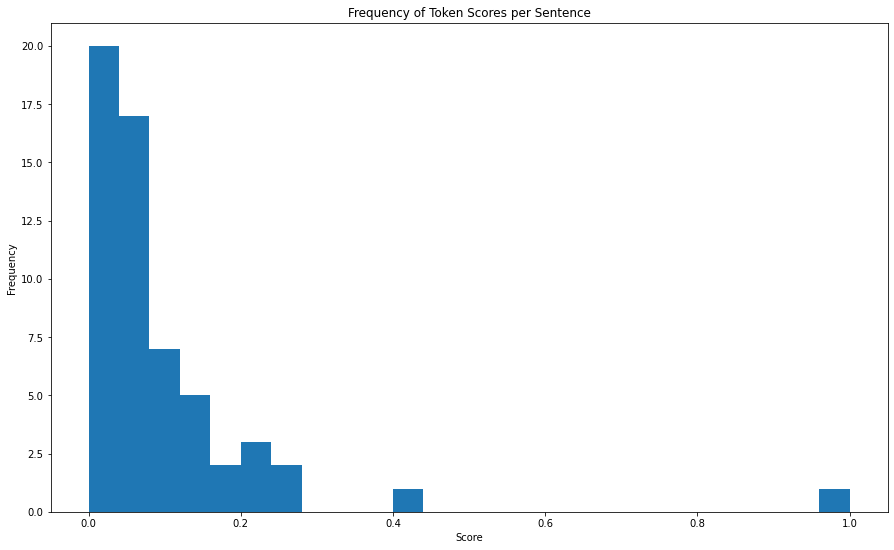

In [20]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.hist(tokens_data, bins=25)
ax.set(xlabel='Score', ylabel='Frequency', title='Frequency of Token Scores per Sentence')

In [22]:
#The most common score tends to be 0.05 or less

### Question 7

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [23]:
def lemma_list(sentence, interesting_lemmas):
    sentences = list(sentence.sents)
    scores = list()
    for sentence in sentences:
        word_count_l = 0
        count_l = 0
        for word in sentence:
            if not(word.is_space or word.is_punct):
                word_count_l += 1
        for lemma in sentence:
            if lemma.lemma_.lower() in frequent_lemmas:
                count_l += 1
        if count_l != 0:
            lemma_score = count_l/word_count_l
        else:
            lemma_score = 0
        scores.append(lemma_score)
    return scores

In [24]:
lemma_list(doc, frequent_lemmas)

[0,
 0.08333333333333333,
 0.09523809523809523,
 0,
 0,
 0.11538461538461539,
 0.2,
 0.5,
 0.25,
 0.17391304347826086,
 0.047619047619047616,
 0.14285714285714285,
 0.25,
 0.125,
 0.045454545454545456,
 0.2222222222222222,
 0.045454545454545456,
 0.1875,
 0.15,
 0.09090909090909091,
 0.11538461538461539,
 0.05263157894736842,
 0.05,
 0.045454545454545456,
 0.1111111111111111,
 0.038461538461538464,
 0,
 0.03333333333333333,
 0.29411764705882354,
 0.08333333333333333,
 0,
 0.14285714285714285,
 0.15151515151515152,
 0.10526315789473684,
 0.05555555555555555,
 0.0967741935483871,
 0,
 0,
 0,
 0.07142857142857142,
 0.14285714285714285,
 0.02857142857142857,
 0,
 0.04,
 0.1111111111111111,
 0.125,
 0.0975609756097561,
 0.06451612903225806,
 0.08333333333333333,
 0.1111111111111111,
 0.04,
 0.12,
 0.06060606060606061,
 0.08695652173913043,
 0.07407407407407407,
 0,
 0.045454545454545456,
 0.4]

In [25]:
lemmas_data = lemma_list(doc, frequent_lemmas)

[Text(0.5, 0, 'Score'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Frequency of Lemma Scores per Sentence')]

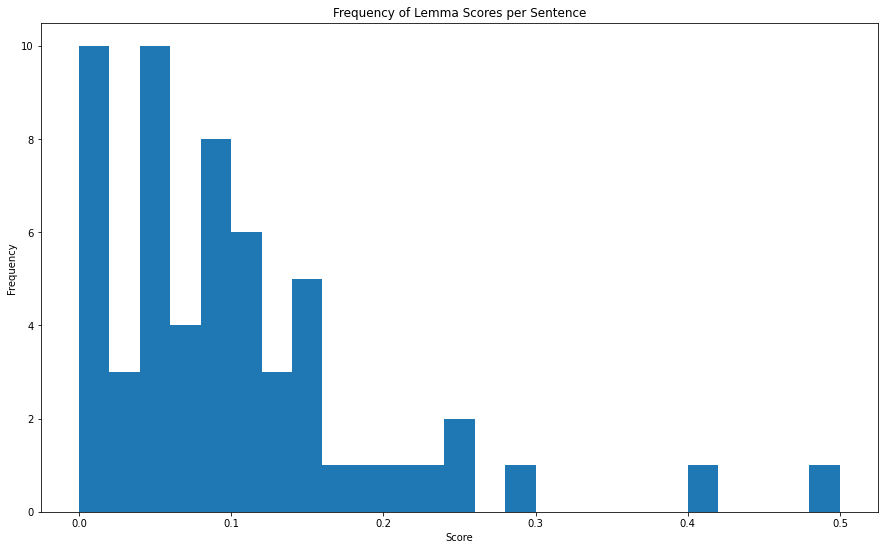

In [26]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.hist(lemmas_data, bins=25)
ax.set(xlabel='Score', ylabel='Frequency', title='Frequency of Lemma Scores per Sentence')

In [27]:
#It looks like the most common ranges of scores are about 0-0.02 and 0.04-0.06. It's interesting that the lemma scores are so low

### Question 8

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

Because we filtered to only show the top 5 most common tokens and lexems, we are only seeing nouns anyway. However, when editing the code to look at the top 20 words, we see more adjectives and verbs like "high", "aftermarket", "low" and "comes." If we wanted to include only nouns, we could include the spacy method .pos_ (Part of Speech) and specify only nouns when defining the "we_care_about" function. For example, this could look like:

def we_care_about(token):
    return (token.pos_ == 'NOUN')

interesting_tokens = [token.pos_(NOUN) for token in doc if we_care_about(token)]

word_freq = Counter(map(str,interesting_tokens))

print("The 5 most common tokens are " + str(word_freq.most_common(5)).lower())